In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

# Figure 8. Landsat availability

Generate the figure that checks Landsat availability in three major growing season months: June, July, and August.

In [2]:
# if needed, change this to the directory containing your data and the name of your data file
landsat_dir = '../data/landsat_availability'

In [3]:
landsat = pd.DataFrame()
for filename in os.listdir(landsat_dir):
    if (filename.endswith('JJA_13states.csv')):
        temp = pd.read_csv(os.path.join(landsat_dir, filename)).drop(['.geo','DRAWSEQ','system:index'],axis=1)
        landsat = pd.concat([temp, landsat], sort=True)
landsat.head()

,STATE_ABBR,STATE_FIPS,STATE_NAME,SUB_REGION,area,max,mean,median,min,stdDev,year
0,MI,26,Michigan,East North Central,72555800.0,17,7.181710,7.000000,0,2.828330,1999
1,WI,55,Wisconsin,East North Central,70941500.0,15,6.064767,6.046944,0,2.708272,1999
2,MN,27,Minnesota,West North Central,113537000.0,16,5.793415,6.044888,0,2.899045,1999
3,ND,38,North Dakota,West North Central,99086800.0,17,8.297884,9.019485,0,3.074194,1999
4,SD,46,South Dakota,West North Central,96940000.0,18,8.202928,8.030869,0,3.344854,1999


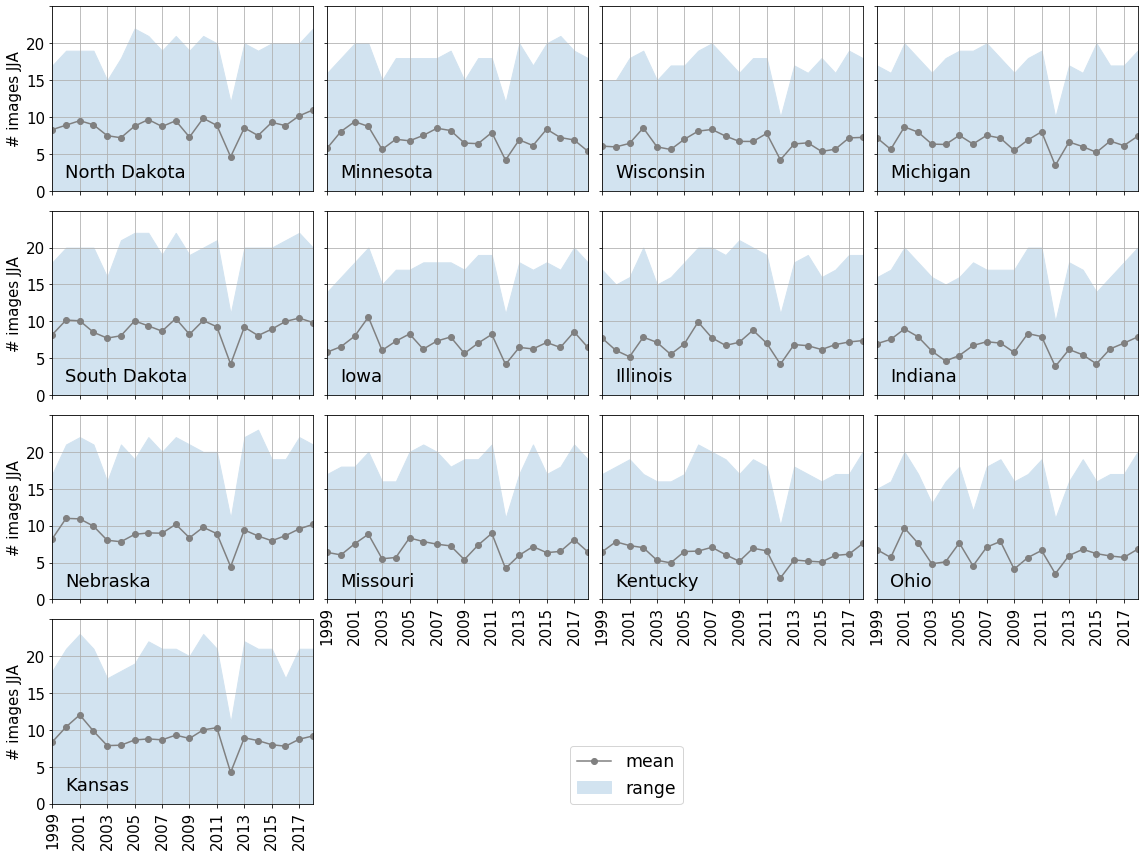

In [8]:
state_geosorted = ['North Dakota','Minnesota', 'Wisconsin' ,'Michigan',
 'South Dakota','Iowa', 'Illinois', 'Indiana',
 'Nebraska', 'Missouri', 'Kentucky','Ohio',
 'Kansas']

fig, ax = plt.subplots(nrows=4, ncols=4,figsize=(16,12))
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.0)
fsize = 15

for i, id in enumerate(state_geosorted):

    group = landsat[landsat['STATE_NAME']==id]
    
    thisAx = ax[int(np.floor(i/4)), i%4]
    group = group.sort_values('year')
    group.plot('year','mean', ax=thisAx, marker='o',color='gray')
    thisAx.fill_between(group['year'].values, group['min'].values, group['max'].values, alpha = 1, color='#d2e3f0')
    
    thisAx.set_ylim([0,25])
    thisAx.text(0.05, 0.1, id, ha="left", va="center", size=18, bbox=bbox_props, transform=thisAx.transAxes)
    
    thisAx.set_yticklabels('', rotation=0)
    
    xlabels = np.arange(1999, 2019,2)     
    thisAx.set_xticks(xlabels)
    thisAx.set_xticklabels('', rotation=90)
    thisAx.set_xlabel('')
    
    thisAx.grid(True)
    thisAx.legend().set_visible(False)

ylabels = np.arange(0,25,5)    
ax[0,0].set_ylabel('# images JJA',fontsize=fsize)
ax[1,0].set_ylabel('# images JJA',fontsize=fsize)
ax[2,0].set_ylabel('# images JJA',fontsize=fsize)
ax[3,0].set_ylabel('# images JJA',fontsize=fsize)    
ax[0,0].set_yticklabels(ylabels, rotation=0,fontsize=fsize)
ax[1,0].set_yticklabels(ylabels, rotation=0,fontsize=fsize)
ax[2,0].set_yticklabels(ylabels, rotation=0,fontsize=fsize)
ax[3,0].set_yticklabels(ylabels, rotation=0,fontsize=fsize)


ax[3,0].set_xticklabels(xlabels, rotation=90,fontsize=fsize)

ax[-1,-1].axis('off')
ax[-1,-2].axis('off')
ax[-1,-3].axis('off')    

fig.tight_layout()
ax[2,1].set_xticklabels(xlabels, rotation=90,fontsize=fsize)
ax[2,2].set_xticklabels(xlabels, rotation=90,fontsize=fsize)
ax[2,3].set_xticklabels(xlabels, rotation=90,fontsize=fsize)

# Create the legend
colors = ['gray','gray']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
mylabels = ['mean', 'range']

fig.legend(lines,     # The line objects
           labels=mylabels,   # The labels for each line
           loc="lower right",   # Position of legend
           bbox_to_anchor=(0.6, 0.05),
           fontsize='xx-large')

fig.show()

In [ ]:
fig.savefig('../../us_crop_type_hindcast/mount/figs/landsat_availability.eps', format='eps')